# AP Research Data Processing Notebook 2: Determine Optimal Temperature For Electroreduction
The following codes in this Jupyter notebook (E0.ipynb) contains the data analysis portion of Benjamin Chang's AP Research project on *Optimal Conditions For Small-Scale Electroreduction of Common Non-Steroidal Anti-Inflammatory Drugs*. All charts, graphs, and figures are produced from the raw data in .csv files and manipulated by the following codes.

## Initializing Libraries and Style

In [3078]:
#importing libraries
import pandas as pd
import numpy as np
import scipy.stats
import math
from matplotlib import pyplot
from IPython.display import HTML

In [3079]:
font = {
    'family' : 'georgia',
    'color': 'black',
    'weight': 'normal',
    'size': 11
}

## Salicylic Acid

In [3091]:
#Merging the data into one dataframe
csv_file_list = ['E1-SA/E1-SA-5.csv', 'E1-SA/E1-SA-10.csv', 'E1-SA/E1-SA-15.csv', 'E1-SA/E1-SA-20.csv', 'E1-SA/E1-SA-25.csv','E1-SA/E1-SA-30.csv', 'E1-SA/E1-SA-35.csv', 
                 'E1-SA/E1-SA-40.csv', 'E1-SA/E1-SA-45.csv', 'E1-SA/E1-SA-50.csv',]

list_of_dataframes = []

for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)

In [3092]:
#Find the percent difference between Absorbance Before and Absorbance After
merged_df['Percent Difference (%)'] = (merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)'])/merged_df['Absorbance Before (Au)']
merged_df['Percent Difference (%)'] = merged_df['Percent Difference (%)']*100

#Find difference between Absorbance Before and Absorbance After
merged_df['Mean Difference'] = merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)']

In [3093]:
#Create a numpy array of standard deviation and store it in the dataframe
std = []

for i in range(5, 55, 5):
    std.append(merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference'].std())

arr = np.array(std)

#Compute the average of every 5 rows and condense the dataframe
merged_df = merged_df.groupby(np.arange(len(merged_df))//5).mean()
df = pd.DataFrame({'Standard Deviation': arr})

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [3094]:
#Compute the t-value (confidence level = 5%, df = 4)
t_value = scipy.stats.t.ppf(q=1-.05/2,df=4)

#Create a numpy array of intervals and store it into the dataframe
intervals = []
for i in range(5, 55, 5):
    interval = t_value * merged_df.loc[merged_df['Temperature (˚C)'] == i]['Standard Deviation'] / math.sqrt(5)
    intervals.append(interval)
intervals = np.array(intervals, dtype='float')
#Squeeze into one dimension
intervals = np.squeeze(intervals)

#Create new dataframe
df2 = pd.DataFrame({'Interval': intervals}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df2], axis=1, join='inner')

In [3095]:
#Create a numpy array of lower bounds and store it into the datagrame
lbd = []
for i in range(5, 55, 5):
    interval = t_value * merged_df.loc[merged_df['Temperature (˚C)'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference']
    lbd.append(mean - interval)
lbd = np.array(lbd, dtype='float')
#Squeeze into one dimension
lbd = np.squeeze(lbd)

#Create new dataframe
df = pd.DataFrame({'Lower Bound': lbd}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [3096]:
#Create a numpy array of upper bounds and store it into the datagrame
ubd = []
for i in range(5, 55, 5):
    interval = t_value * merged_df.loc[merged_df['Temperature (˚C)'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference']
    ubd.append(mean + interval)
ubd = np.array(ubd, dtype='float')
#Squeeze into one dimension
ubd = np.squeeze(ubd)

#Create new dataframe
df1 = pd.DataFrame({'Upper Bound': ubd}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df1], axis=1, join='inner')

In [3097]:
#Create a numpy array of upper bounds and store it into the datagrame
full = []
for i in range(5, 55, 5):
    mean = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference'].round(5).apply(str)
    interval = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Interval'].round(5).apply(str)
    # Store string 
    full.append(mean + ' ± ' + interval)
full = np.array(full, dtype='object')

# Squeeze into one dimension
full = np.squeeze(full)

#Create new dataframe
df = pd.DataFrame({'Confidence Interval': full}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

#Drop the Trial row
merged_df = merged_df.drop(['Trial'], axis=1)

#Save to new csv file
merged_df.to_csv('Processed Data/E1-SA-Processed.csv')

# Keep only the columns we need
save_dfSA = merged_df[['Temperature (˚C)', 'Percent Difference (%)', 'Mean Difference', 'Interval']]

#Output table as HTML
merged_df.to_html('Tables/E1-SA-Table.html')
merged_df

,Temperature (˚C),Wavelength (nm),Absorbance Before (Au),Absorbance After (Au),Percent Difference (%),Mean Difference,Standard Deviation,Interval,Lower Bound,Upper Bound,Confidence Interval
0,5.0,330.0,0.16842,0.14646,-13.038765,-0.02196,0.000336,0.000417,-0.022377,-0.021543,-0.02196 ± 0.00042
1,10.0,330.0,0.16862,0.14818,-12.121644,-0.02044,0.000477,0.000593,-0.021033,-0.019847,-0.02044 ± 0.00059
2,15.0,330.0,0.16856,0.14932,-11.414178,-0.01924,0.000251,0.000312,-0.019552,-0.018928,-0.01924 ± 0.00031
3,20.0,330.0,0.16848,0.15240,-9.544007,-0.01608,0.000295,0.000366,-0.016446,-0.015714,-0.01608 ± 0.00037
4,25.0,330.0,0.16844,0.15350,-8.869338,-0.01494,0.000397,0.000494,-0.015434,-0.014446,-0.01494 ± 0.00049
5,30.0,330.0,0.16830,0.15628,-7.141922,-0.01202,0.000217,0.000269,-0.012289,-0.011751,-0.01202 ± 0.00027
6,35.0,330.0,0.16848,0.15852,-5.911397,-0.00996,0.000445,0.000553,-0.010513,-0.009407,-0.00996 ± 0.00055
7,40.0,330.0,0.16844,0.16234,-3.621212,-0.00610,0.000430,0.000534,-0.006634,-0.005566,-0.0061 ± 0.00053
8,45.0,330.0,0.16816,0.16320,-2.949518,-0.00496,0.000114,0.000142,-0.005102,-0.004818,-0.00496 ± 0.00014
9,50.0,330.0,0.16840,0.16524,-1.876367,-0.00316,0.000270,0.000335,-0.003495,-0.002825,-0.00316 ± 0.00034


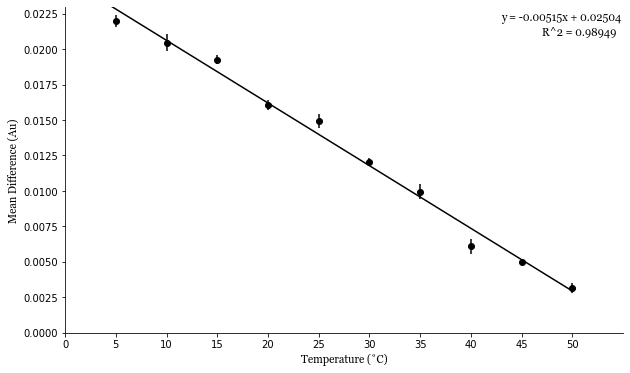

In [3098]:
#Add absolute value to mean difference to get magnitude
merged_df['Mean Difference'] = abs(merged_df['Mean Difference'])

#Figure size
pyplot.figure(figsize=(10, 6))

#Error bar
pyplot.errorbar(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], yerr=merged_df['Interval'], fmt='ko')

#Labels use font initialized above
pyplot.xlabel('Temperature (˚C)', fontdict = font)
pyplot.ylabel('Mean Difference (Au)', fontdict = font)

#Fix x-axis and y-axis limits
pyplot.xlim(0, 55)
pyplot.ylim(0, 0.023)

#Fix x-axis and y-axis ticks
pyplot.xticks(np.arange(0, 55, 5))
pyplot.yticks(np.arange(0, 0.023, 0.0025))

#Plot the linear regression line
pyplot.plot(np.arange(0, 55, 5), np.poly1d(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1))(np.arange(0, 53, 5)), color = 'black')

#Put the linear regression equation rounded to 5 digits on graph upper right
pyplot.text(43, 0.022, 'y = -' + str(round(np.poly1d(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1))(45), 5)) + 'x + ' + str(round(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1)[1], 5)), fontdict = font)

#Put the R-squared value on graph
pyplot.text(47, 0.021, 'R^2 = ' + str(round(np.corrcoef(merged_df['Temperature (˚C)'], merged_df['Mean Difference'])[0, 1]**2, 5)), fontdict = font)

#Remove up and right border
pyplot.gca().spines['right'].set_visible(False)
pyplot.gca().spines['top'].set_visible(False)

#Save the figure
pyplot.savefig('Graphs/E1-SA-Graph.jpg', dpi=500)

#Show the figure
pyplot.show()

#Create new dataframe with column 1) sample 2) linear regression equation 3) R-squared value
dfr = pd.DataFrame({'Sample': ['E1-SA'], 'Linear Regression Equation': [str(round(np.poly1d(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1))(0), 5)) + 'x + ' + str(round(np.poly1d(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1))(1), 5))], 'R-squared Value': [round(np.corrcoef(merged_df['Temperature (˚C)'], merged_df['Mean Difference'])[0, 1]**2, 5)]})

## Ethyl Alcohol

In [3099]:
#Merging the data into one dataframe
csv_file_list = ['E1-EA/E1-EA-5.csv', 'E1-EA/E1-EA-10.csv', 'E1-EA/E1-EA-15.csv', 'E1-EA/E1-EA-20.csv', 'E1-EA/E1-EA-25.csv','E1-EA/E1-EA-30.csv', 'E1-EA/E1-EA-35.csv', 
                 'E1-EA/E1-EA-40.csv', 'E1-EA/E1-EA-45.csv', 'E1-EA/E1-EA-50.csv',]

list_of_dataframes = []

for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)

In [3100]:
#Find the percent difference between Absorbance Before and Absorbance After
merged_df['Percent Difference (%)'] = (merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)'])/merged_df['Absorbance Before (Au)']
merged_df['Percent Difference (%)'] = merged_df['Percent Difference (%)']*100

#Find difference between Absorbance Before and Absorbance After
merged_df['Mean Difference'] = merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)']

In [3101]:
#Create a numpy array of standard deviation and store it in the dataframe
std = []

for i in range(5, 55, 5):
    std.append(merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference'].std())

arr = np.array(std)

#Compute the average of every 5 rows and condense the dataframe
merged_df = merged_df.groupby(np.arange(len(merged_df))//5).mean()
df = pd.DataFrame({'Standard Deviation': arr})

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [3102]:
#Compute the t-value (confidence level = 5%, df = 4)
t_value = scipy.stats.t.ppf(q=1-.05/2,df=4)

#Create a numpy array of intervals and store it into the dataframe
intervals = []
for i in range(5, 55, 5):
    interval = t_value * merged_df.loc[merged_df['Temperature (˚C)'] == i]['Standard Deviation'] / math.sqrt(5)
    intervals.append(interval)
intervals = np.array(intervals, dtype='float')
#Squeeze into one dimension
intervals = np.squeeze(intervals)

#Create new dataframe
df2 = pd.DataFrame({'Interval': intervals}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df2], axis=1, join='inner')

In [3103]:
#Create a numpy array of lower bounds and store it into the datagrame
lbd = []
for i in range(5, 55, 5):
    interval = t_value * merged_df.loc[merged_df['Temperature (˚C)'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference']
    lbd.append(mean - interval)
lbd = np.array(lbd, dtype='float')
#Squeeze into one dimension
lbd = np.squeeze(lbd)

#Create new dataframe
df = pd.DataFrame({'Lower Bound': lbd}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [3104]:
#Create a numpy array of upper bounds and store it into the datagrame
ubd = []
for i in range(5, 55, 5):
    interval = t_value * merged_df.loc[merged_df['Temperature (˚C)'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference']
    ubd.append(mean + interval)
ubd = np.array(ubd, dtype='float')
#Squeeze into one dimension
ubd = np.squeeze(ubd)

#Create new dataframe
df1 = pd.DataFrame({'Upper Bound': ubd}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df1], axis=1, join='inner')

In [3105]:
#Create a numpy array of upper bounds and store it into the datagrame
full = []
for i in range(5, 55, 5):
    mean = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference'].round(5).apply(str)
    interval = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Interval'].round(5).apply(str)
    # Store string 
    full.append(mean + ' ± ' + interval)
full = np.array(full, dtype='object')

# Squeeze into one dimension
full = np.squeeze(full)

#Create new dataframe
df = pd.DataFrame({'Confidence Interval': full}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

#Drop the Trial row
merged_df = merged_df.drop(['Trial'], axis=1)

#Save to new csv file
merged_df.to_csv('Processed Data/E1-EA-Processed.csv')

# Keep only the columns we need
save_dfEA = merged_df[['Temperature (˚C)', 'Percent Difference (%)', 'Mean Difference', 'Interval']]

#Output table as HTML
merged_df.to_html('Tables/E1-EA-Table.html')
merged_df

,Temperature (˚C),Wavelength (nm),Absorbance Before (Au),Absorbance After (Au),Percent Difference (%),Mean Difference,Standard Deviation,Interval,Lower Bound,Upper Bound,Confidence Interval
0,5.0,330.0,0.45924,0.16558,-63.944784,-0.29366,0.000297,0.000368,-0.294028,-0.293292,-0.29366 ± 0.00037
1,10.0,330.0,0.45914,0.18332,-60.073187,-0.27582,0.000736,0.000914,-0.276734,-0.274906,-0.27582 ± 0.00091
2,15.0,330.0,0.45916,0.20756,-54.795720,-0.25160,0.000539,0.000669,-0.252269,-0.250931,-0.2516 ± 0.00067
3,20.0,330.0,0.45922,0.24554,-46.531068,-0.21368,0.000363,0.000451,-0.214131,-0.213229,-0.21368 ± 0.00045
4,25.0,330.0,0.45922,0.32760,-28.661653,-0.13162,0.000370,0.000460,-0.132080,-0.131160,-0.13162 ± 0.00046
5,30.0,330.0,0.45918,0.42054,-8.415019,-0.03864,0.002117,0.002629,-0.041269,-0.036011,-0.03864 ± 0.00263
6,35.0,330.0,0.45922,0.43118,-6.105973,-0.02804,0.000702,0.000872,-0.028912,-0.027168,-0.02804 ± 0.00087
7,40.0,330.0,0.45918,0.43586,-5.078611,-0.02332,0.000536,0.000665,-0.023985,-0.022655,-0.02332 ± 0.00067
8,45.0,330.0,0.45934,0.44760,-2.555824,-0.01174,0.000451,0.000559,-0.012299,-0.011181,-0.01174 ± 0.00056
9,50.0,330.0,0.45926,0.44948,-2.129508,-0.00978,0.000327,0.000406,-0.010186,-0.009374,-0.00978 ± 0.00041


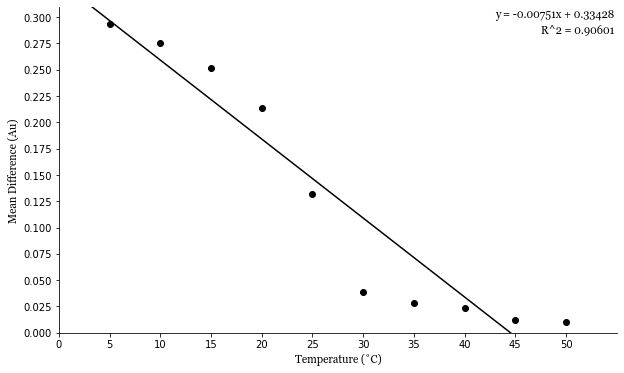

In [3106]:
#Add absolute value to mean difference to get magnitude
merged_df['Mean Difference'] = abs(merged_df['Mean Difference'])

#Figure size
pyplot.figure(figsize=(10, 6))

#Error bar
pyplot.errorbar(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], yerr=merged_df['Interval'], fmt='ko')

#Labels use font initialized above
pyplot.xlabel('Temperature (˚C)', fontdict = font)
pyplot.ylabel('Mean Difference (Au)', fontdict = font)

#Fix x-axis and y-axis limits
pyplot.xlim(0, 55)
pyplot.ylim(0, 0.31)

#Fix x-axis and y-axis ticks
pyplot.xticks(np.arange(0, 55, 5))
pyplot.yticks(np.arange(0, 0.31, 0.025))

#Plot the linear regression line
pyplot.plot(np.arange(0, 53, 5), np.poly1d(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1))(np.arange(0, 53, 5)), color = 'black')

#Put the linear regression equation rounded to 5 digits on graph
pyplot.text(43, 0.30, 'y = ' + str(round(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1)[0], 5)) + 'x + ' + str(round(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1)[1], 5)), fontdict = font)

#Put the r-squared value on graph
pyplot.text(47.5, 0.285, 'R^2 = ' + str(round(np.corrcoef(merged_df['Temperature (˚C)'], merged_df['Mean Difference'])[0, 1]**2, 5)), fontdict = font)

#Remove up and right border
pyplot.gca().spines['right'].set_visible(False)
pyplot.gca().spines['top'].set_visible(False)

#Save the figure
pyplot.savefig('Graphs/E1-EA-Graph.jpg', dpi=500)

#Show the figure
pyplot.show()

#Add data into existing dataframe dfr with 1) sample 2) linear regression equation 3) R-squared value
dfrr = {'Sample': 'E1-EA', 'Linear Regression Equation': str(round(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1)[0], 5)) + 'x + ' + str(round(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1)[1], 5)), 'R-squared Value': round(np.corrcoef(merged_df['Temperature (˚C)'], merged_df['Mean Difference'])[0, 1]**2, 5)}
dfr = dfr.append(dfrr, ignore_index = True)

## Citric Acid Monohydrate

In [3107]:
#Merging the data into one dataframe
csv_file_list = ['E1-CAM/E1-CAM-5.csv', 'E1-CAM/E1-CAM-10.csv', 'E1-CAM/E1-CAM-15.csv', 'E1-CAM/E1-CAM-20.csv', 'E1-CAM/E1-CAM-25.csv','E1-CAM/E1-CAM-30.csv', 'E1-CAM/E1-CAM-35.csv', 
                 'E1-CAM/E1-CAM-40.csv', 'E1-CAM/E1-CAM-45.csv', 'E1-CAM/E1-CAM-50.csv',]

list_of_dataframes = []

for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)

In [3108]:
#Find the percent difference between Absorbance Before and Absorbance After
merged_df['Percent Difference (%)'] = (merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)'])/merged_df['Absorbance Before (Au)']
merged_df['Percent Difference (%)'] = merged_df['Percent Difference (%)']*100

#Find difference between Absorbance Before and Absorbance After
merged_df['Mean Difference'] = merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)']

In [3109]:
#Create a numpy array of standard deviation and store it in the dataframe
std = []

for i in range(5, 55, 5):
    std.append(merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference'].std())

arr = np.array(std)

#Compute the average of every 5 rows and condense the dataframe
merged_df = merged_df.groupby(np.arange(len(merged_df))//5).mean()
df = pd.DataFrame({'Standard Deviation': arr})

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [3110]:
#Compute the t-value (confidence level = 5%, df = 4)
t_value = scipy.stats.t.ppf(q=1-.05/2,df=4)

#Create a numpy array of intervals and store it into the dataframe
intervals = []
for i in range(5, 55, 5):
    interval = t_value * merged_df.loc[merged_df['Temperature (˚C)'] == i]['Standard Deviation'] / math.sqrt(5)
    intervals.append(interval)
intervals = np.array(intervals, dtype='float')
#Squeeze into one dimension
intervals = np.squeeze(intervals)

#Create new dataframe
df2 = pd.DataFrame({'Interval': intervals}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df2], axis=1, join='inner')

In [3111]:
#Create a numpy array of lower bounds and store it into the datagrame
lbd = []
for i in range(5, 55, 5):
    interval = t_value * merged_df.loc[merged_df['Temperature (˚C)'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference']
    lbd.append(mean - interval)
lbd = np.array(lbd, dtype='float')
#Squeeze into one dimension
lbd = np.squeeze(lbd)

#Create new dataframe
df = pd.DataFrame({'Lower Bound': lbd}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [3112]:
#Create a numpy array of upper bounds and store it into the datagrame
ubd = []
for i in range(5, 55, 5):
    interval = t_value * merged_df.loc[merged_df['Temperature (˚C)'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference']
    ubd.append(mean + interval)
ubd = np.array(ubd, dtype='float')
#Squeeze into one dimension
ubd = np.squeeze(ubd)

#Create new dataframe
df1 = pd.DataFrame({'Upper Bound': ubd}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df1], axis=1, join='inner')

In [3113]:
#Create a numpy array of upper bounds and store it into the datagrame
full = []
for i in range(5, 55, 5):
    mean = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference'].round(5).apply(str)
    interval = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Interval'].round(5).apply(str)
    # Store string 
    full.append(mean + ' ± ' + interval)
full = np.array(full, dtype='object')

# Squeeze into one dimension
full = np.squeeze(full)

#Create new dataframe
df = pd.DataFrame({'Confidence Interval': full}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

#Drop the Trial row
merged_df = merged_df.drop(['Trial'], axis=1)

#Save to new csv file
merged_df.to_csv('Processed Data/E1-CAM-Processed.csv')

# Keep only the columns we need
save_dfCAM = merged_df[['Temperature (˚C)', 'Percent Difference (%)', 'Mean Difference', 'Interval']]

#Output table as HTML
merged_df.to_html('Tables/E1-CAM-Table.html')
merged_df

,Temperature (˚C),Wavelength (nm),Absorbance Before (Au),Absorbance After (Au),Percent Difference (%),Mean Difference,Standard Deviation,Interval,Lower Bound,Upper Bound,Confidence Interval
0,5.0,330.0,0.05766,0.05248,-8.982971,-0.00518,0.000286,0.000356,-0.005536,-0.004824,-0.00518 ± 0.00036
1,10.0,330.0,0.05758,0.05144,-10.661738,-0.00614,0.000344,0.000427,-0.006567,-0.005713,-0.00614 ± 0.00043
2,15.0,330.0,0.05748,0.05056,-12.036647,-0.00692,0.000487,0.000604,-0.007524,-0.006316,-0.00692 ± 0.0006
3,20.0,330.0,0.05760,0.04938,-14.266175,-0.00822,0.000638,0.000792,-0.009012,-0.007428,-0.00822 ± 0.00079
4,25.0,330.0,0.05752,0.04248,-26.147878,-0.01504,0.000152,0.000188,-0.015228,-0.014852,-0.01504 ± 0.00019
5,30.0,330.0,0.05756,0.04058,-29.497358,-0.01698,0.000476,0.000592,-0.017572,-0.016388,-0.01698 ± 0.00059
6,35.0,330.0,0.05756,0.03860,-32.938786,-0.01896,0.000297,0.000368,-0.019328,-0.018592,-0.01896 ± 0.00037
7,40.0,330.0,0.05756,0.03744,-34.952579,-0.02012,0.000517,0.000642,-0.020762,-0.019478,-0.02012 ± 0.00064
8,45.0,330.0,0.05756,0.03718,-35.405729,-0.02038,0.000249,0.000309,-0.020689,-0.020071,-0.02038 ± 0.00031
9,50.0,330.0,0.05756,0.03668,-36.273621,-0.02088,0.000356,0.000442,-0.021322,-0.020438,-0.02088 ± 0.00044


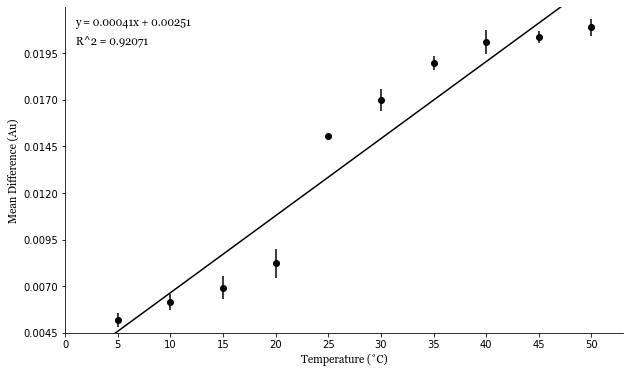

In [3114]:
#Add absolute value to mean difference to get magnitude
merged_df['Mean Difference'] = abs(merged_df['Mean Difference'])

#Figure size
pyplot.figure(figsize=(10, 6))

#Error bar
pyplot.errorbar(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], yerr=merged_df['Interval'], fmt='ko')

#Labels use font initialized above
pyplot.xlabel('Temperature (˚C)', fontdict = font)
pyplot.ylabel('Mean Difference (Au)', fontdict = font)

#Fix x-axis and y-axis limits
pyplot.xlim(0, 53)
pyplot.ylim(0.0045, 0.022)

#Fix x-axis and y-axis ticks
pyplot.xticks(np.arange(0, 55, 5))
pyplot.yticks(np.arange(0.0045, 0.022, 0.0025))

#Plot the linear regression line
pyplot.plot(np.arange(0, 53, 5), np.poly1d(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1))(np.arange(0, 53, 5)), color = 'black')

#Put the linear regression equation rounded to 5 digits on graph
pyplot.text(1, 0.021, 'y = ' + str(round(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1)[0], 5)) + 'x + ' + str(round(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1)[1], 5)), fontdict = font)

#Put the r-squared value on graph
pyplot.text(1, 0.02, 'R^2 = ' + str(round(np.corrcoef(merged_df['Temperature (˚C)'], merged_df['Mean Difference'])[0, 1]**2, 5)), fontdict = font)

#Remove up and right border
pyplot.gca().spines['right'].set_visible(False)
pyplot.gca().spines['top'].set_visible(False)

#Save the figure
pyplot.savefig('Graphs/E1-CAM-Graph.jpg', dpi=500)

#Show the figure
pyplot.show()

#Add data into existing dataframe dfr with 1) sample 2) linear regression equation 3) R-squared value
dfrr = {'Sample': 'E1-CAM', 'Linear Regression Equation': str(round(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1)[0], 5)) + 'x + ' + str(round(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1)[1], 5)), 'R-squared Value': round(np.corrcoef(merged_df['Temperature (˚C)'], merged_df['Mean Difference'])[0, 1]**2, 5)}
dfr = dfr.append(dfrr, ignore_index = True)

## Acetylsalicylic Acid

In [3115]:
#Merging the data into one dataframe
csv_file_list = ['E1-AA/E1-AA-5.csv', 'E1-AA/E1-AA-10.csv', 'E1-AA/E1-AA-15.csv', 'E1-AA/E1-AA-20.csv', 'E1-AA/E1-AA-25.csv','E1-AA/E1-AA-30.csv', 'E1-AA/E1-AA-35.csv', 
                 'E1-AA/E1-AA-40.csv', 'E1-AA/E1-AA-45.csv', 'E1-AA/E1-AA-50.csv',]

list_of_dataframes = []

for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)

In [3116]:
#Find the percent difference between Absorbance Before and Absorbance After
merged_df['Percent Difference (%)'] = (merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)'])/merged_df['Absorbance Before (Au)']
merged_df['Percent Difference (%)'] = merged_df['Percent Difference (%)']*100

#Find difference between Absorbance Before and Absorbance After
merged_df['Mean Difference'] = merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)']

In [3117]:
#Create a numpy array of standard deviation and store it in the dataframe
std = []

for i in range(5, 55, 5):
    std.append(merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference'].std())

arr = np.array(std)

#Compute the average of every 5 rows and condense the dataframe
merged_df = merged_df.groupby(np.arange(len(merged_df))//5).mean()
df = pd.DataFrame({'Standard Deviation': arr})

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [3118]:
#Compute the t-value (confidence level = 5%, df = 4)
t_value = scipy.stats.t.ppf(q=1-.05/2,df=4)

#Create a numpy array of intervals and store it into the dataframe
intervals = []
for i in range(5, 55, 5):
    interval = t_value * merged_df.loc[merged_df['Temperature (˚C)'] == i]['Standard Deviation'] / math.sqrt(5)
    intervals.append(interval)
intervals = np.array(intervals, dtype='float')
#Squeeze into one dimension
intervals = np.squeeze(intervals)

#Create new dataframe
df2 = pd.DataFrame({'Interval': intervals}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df2], axis=1, join='inner')

In [3119]:
#Create a numpy array of lower bounds and store it into the datagrame
lbd = []
for i in range(5, 55, 5):
    interval = t_value * merged_df.loc[merged_df['Temperature (˚C)'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference']
    lbd.append(mean - interval)
lbd = np.array(lbd, dtype='float')
#Squeeze into one dimension
lbd = np.squeeze(lbd)

#Create new dataframe
df = pd.DataFrame({'Lower Bound': lbd}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [3120]:
#Create a numpy array of upper bounds and store it into the datagrame
ubd = []
for i in range(5, 55, 5):
    interval = t_value * merged_df.loc[merged_df['Temperature (˚C)'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference']
    ubd.append(mean + interval)
ubd = np.array(ubd, dtype='float')
#Squeeze into one dimension
ubd = np.squeeze(ubd)

#Create new dataframe
df1 = pd.DataFrame({'Upper Bound': ubd}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df1], axis=1, join='inner')

In [3121]:
#Create a numpy array of upper bounds and store it into the datagrame
full = []
for i in range(5, 55, 5):
    mean = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference'].round(5).apply(str)
    interval = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Interval'].round(5).apply(str)
    # Store string 
    full.append(mean + ' ± ' + interval)
full = np.array(full, dtype='object')

# Squeeze into one dimension
full = np.squeeze(full)

#Create new dataframe
df = pd.DataFrame({'Confidence Interval': full}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

#Drop the Trial row
merged_df = merged_df.drop(['Trial'], axis=1)

#Save to new csv file
merged_df.to_csv('Processed Data/E1-AA-Processed.csv')

# Keep only the columns we need
save_dfAA = merged_df[['Temperature (˚C)', 'Percent Difference (%)', 'Mean Difference', 'Interval']]

#Output table as HTML
merged_df.to_html('Tables/E1-AA-Table.html')
merged_df

,Temperature (˚C),Wavelength (nm),Absorbance Before (Au),Absorbance After (Au),Percent Difference (%),Mean Difference,Standard Deviation,Interval,Lower Bound,Upper Bound,Confidence Interval
0,5.0,330.0,0.05872,0.00062,-98.945274,-0.05810,0.000187,0.000232,-0.058332,-0.057868,-0.0581 ± 0.00023
1,10.0,330.0,0.05874,0.00224,-96.187618,-0.05650,0.000187,0.000232,-0.056732,-0.056268,-0.0565 ± 0.00023
2,15.0,330.0,0.05878,0.00816,-86.117713,-0.05062,0.000342,0.000425,-0.051045,-0.050195,-0.05062 ± 0.00042
3,20.0,330.0,0.05882,0.00288,-95.102110,-0.05594,0.000631,0.000783,-0.056723,-0.055157,-0.05594 ± 0.00078
4,25.0,330.0,0.05886,0.00936,-84.096797,-0.04950,0.000430,0.000534,-0.050034,-0.048966,-0.0495 ± 0.00053
5,30.0,330.0,0.05876,0.04246,-27.738081,-0.01630,0.000430,0.000534,-0.016834,-0.015766,-0.0163 ± 0.00053
6,35.0,330.0,0.05874,0.03930,-33.092709,-0.01944,0.000503,0.000625,-0.020065,-0.018815,-0.01944 ± 0.00062
7,40.0,330.0,0.05880,0.03886,-33.909604,-0.01994,0.000498,0.000618,-0.020558,-0.019322,-0.01994 ± 0.00062
8,45.0,330.0,0.05872,0.04240,-27.790347,-0.01632,0.000507,0.000629,-0.016949,-0.015691,-0.01632 ± 0.00063
9,50.0,330.0,0.05882,0.04342,-26.179580,-0.01540,0.000424,0.000527,-0.015927,-0.014873,-0.0154 ± 0.00053


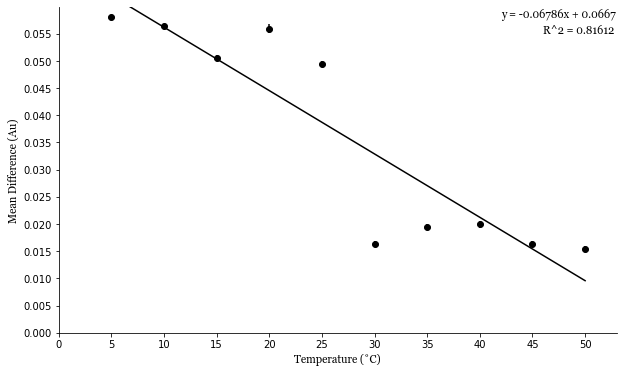

In [3122]:
#Add absolute value to mean difference to get magnitude
merged_df['Mean Difference'] = abs(merged_df['Mean Difference'])

#Figure size
pyplot.figure(figsize=(10, 6))

#Error bar
pyplot.errorbar(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], yerr=merged_df['Interval'], fmt='ko')

#Labels use font initialized above
pyplot.xlabel('Temperature (˚C)', fontdict = font)
pyplot.ylabel('Mean Difference (Au)', fontdict = font)

#Fix x-axis and y-axis limits
pyplot.xlim(0, 53)
pyplot.ylim(0, 0.06)

#Fix x-axis and y-axis ticks
pyplot.xticks(np.arange(0, 55, 5))
pyplot.yticks(np.arange(0, 0.06, 0.005))

#Plot the linear regression line
pyplot.plot(np.arange(0, 55, 5), np.poly1d(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1))(np.arange(0, 53, 5)), color = 'black')

#Put the linear regression equation rounded to 5 digits on graph
pyplot.text(42, 0.058, 'y = -' + str(round(np.poly1d(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1))(0), 5)) + 'x + ' + str(round(np.poly1d(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1))(1), 5)), fontdict = font)

#Put the R-squared value on graph
pyplot.text(46, 0.055, 'R^2 = ' + str(np.round(np.corrcoef(merged_df['Temperature (˚C)'], merged_df['Mean Difference'])[0, 1]**2, 5)), fontdict = font)

#Remove up and right border
pyplot.gca().spines['right'].set_visible(False)
pyplot.gca().spines['top'].set_visible(False)

#Save the figure
pyplot.savefig('Graphs/E1-AA-Graph.jpg', dpi=500)

#Show the figure
pyplot.show()

#Add data into existing dataframe dfr with 1) sample 2) linear regression equation 3) R-squared value
dfrr = {'Sample': 'E1-AA', 'Linear Regression Equation': str(round(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1)[0], 5)) + 'x + ' + str(round(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1)[1], 5)), 'R-squared Value': round(np.corrcoef(merged_df['Temperature (˚C)'], merged_df['Mean Difference'])[0, 1]**2, 5)}
dfr = dfr.append(dfrr, ignore_index = True)

## Acetaminophen

In [3123]:
#Merging the data into one dataframe
csv_file_list = ['E1-A/E1-A-5.csv', 'E1-A/E1-A-10.csv', 'E1-A/E1-A-15.csv', 'E1-A/E1-A-20.csv', 'E1-A/E1-A-25.csv','E1-A/E1-A-30.csv', 'E1-A/E1-A-35.csv', 
                 'E1-A/E1-A-40.csv', 'E1-A/E1-A-45.csv', 'E1-A/E1-A-50.csv',]

list_of_dataframes = []

for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)

In [3124]:
#Find the percent difference between Absorbance Before and Absorbance After
merged_df['Percent Difference (%)'] = (merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)'])/merged_df['Absorbance Before (Au)']
merged_df['Percent Difference (%)'] = merged_df['Percent Difference (%)']*100

#Find difference between Absorbance Before and Absorbance After
merged_df['Mean Difference'] = merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)']

In [3125]:
#Create a numpy array of standard deviation and store it in the dataframe
std = []

for i in range(5, 55, 5):
    std.append(merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference'].std())

arr = np.array(std)

#Compute the average of every 5 rows and condense the dataframe
merged_df = merged_df.groupby(np.arange(len(merged_df))//5).mean()
df = pd.DataFrame({'Standard Deviation': arr})

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [3126]:
#Compute the t-value (confidence level = 5%, df = 4)
t_value = scipy.stats.t.ppf(q=1-.05/2,df=4)

#Create a numpy array of intervals and store it into the dataframe
intervals = []
for i in range(5, 55, 5):
    interval = t_value * merged_df.loc[merged_df['Temperature (˚C)'] == i]['Standard Deviation'] / math.sqrt(5)
    intervals.append(interval)
intervals = np.array(intervals, dtype='float')
#Squeeze into one dimension
intervals = np.squeeze(intervals)

#Create new dataframe
df2 = pd.DataFrame({'Interval': intervals}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df2], axis=1, join='inner')

In [3127]:
#Create a numpy array of lower bounds and store it into the datagrame
lbd = []
for i in range(5, 55, 5):
    interval = t_value * merged_df.loc[merged_df['Temperature (˚C)'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference']
    lbd.append(mean - interval)
lbd = np.array(lbd, dtype='float')
#Squeeze into one dimension
lbd = np.squeeze(lbd)

#Create new dataframe
df = pd.DataFrame({'Lower Bound': lbd}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [3128]:
#Create a numpy array of upper bounds and store it into the datagrame
ubd = []
for i in range(5, 55, 5):
    interval = t_value * merged_df.loc[merged_df['Temperature (˚C)'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference']
    ubd.append(mean + interval)
ubd = np.array(ubd, dtype='float')
#Squeeze into one dimension
ubd = np.squeeze(ubd)

#Create new dataframe
df1 = pd.DataFrame({'Upper Bound': ubd}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df1], axis=1, join='inner')

In [3129]:
#Create a numpy array of upper bounds and store it into the datagrame
full = []
for i in range(5, 55, 5):
    mean = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Mean Difference'].round(5).apply(str)
    interval = merged_df.loc[merged_df['Temperature (˚C)'] == i]['Interval'].round(5).apply(str)
    # Store string 
    full.append(mean + ' ± ' + interval)
full = np.array(full, dtype='object')

# Squeeze into one dimension
full = np.squeeze(full)

#Create new dataframe
df = pd.DataFrame({'Confidence Interval': full}, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

#Remove trial column from dataframe
merged_df = merged_df.drop(['Trial'], axis=1)

#Save to new csv file
merged_df.to_csv('Processed Data/E1-A-Processed.csv')

# Keep only the columns we need
save_dfA = merged_df[['Temperature (˚C)', 'Percent Difference (%)', 'Mean Difference', 'Interval']]

#Output table as HTML
merged_df.to_html('Tables/E1-A-Table.html')
merged_df

,Temperature (˚C),Wavelength (nm),Absorbance Before (Au),Absorbance After (Au),Percent Difference (%),Mean Difference,Standard Deviation,Interval,Lower Bound,Upper Bound,Confidence Interval
0,5.0,330.0,0.43230,0.29436,-31.908390,-0.13794,0.000344,0.000427,-0.138367,-0.137513,-0.13794 ± 0.00043
1,10.0,330.0,0.43232,0.30330,-29.843601,-0.12902,0.000370,0.000460,-0.129480,-0.128560,-0.12902 ± 0.00046
2,15.0,330.0,0.43234,0.33554,-22.389774,-0.09680,0.000406,0.000504,-0.097304,-0.096296,-0.0968 ± 0.0005
3,20.0,330.0,0.43236,0.35536,-17.809217,-0.07700,0.000430,0.000534,-0.077534,-0.076466,-0.077 ± 0.00053
4,25.0,330.0,0.43232,0.36526,-15.511654,-0.06706,0.000089,0.000111,-0.067171,-0.066949,-0.06706 ± 0.00011
5,30.0,330.0,0.43240,0.38736,-10.416251,-0.04504,0.000365,0.000453,-0.045493,-0.044587,-0.04504 ± 0.00045
6,35.0,330.0,0.43224,0.40052,-7.338496,-0.03172,0.000319,0.000397,-0.032117,-0.031323,-0.03172 ± 0.0004
7,40.0,330.0,0.43238,0.41336,-4.398887,-0.01902,0.000335,0.000416,-0.019436,-0.018604,-0.01902 ± 0.00042
8,45.0,330.0,0.43232,0.41844,-3.210562,-0.01388,0.000342,0.000425,-0.014305,-0.013455,-0.01388 ± 0.00042
9,50.0,330.0,0.43242,0.42018,-2.830539,-0.01224,0.000321,0.000398,-0.012638,-0.011842,-0.01224 ± 0.0004


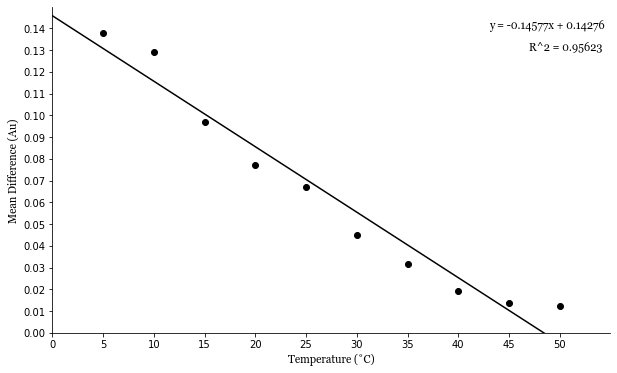

In [3130]:
#Add absolute value to mean difference to get magnitude
merged_df['Mean Difference'] = abs(merged_df['Mean Difference'])

#Figure size
pyplot.figure(figsize=(10, 6))

#Error bar
pyplot.errorbar(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], yerr=merged_df['Interval'], fmt='ko')

#Labels use font initialized above
pyplot.xlabel('Temperature (˚C)', fontdict = font)
pyplot.ylabel('Mean Difference (Au)', fontdict = font)

#Fix x-axis and y-axis limits
pyplot.xlim(0, 55)
pyplot.ylim(0, 0.15)

#Fix x-axis and y-axis ticks
pyplot.xticks(np.arange(0, 55, 5))
pyplot.yticks(np.arange(0, 0.15, 0.01))

#Plot the linear regression line
pyplot.plot(np.arange(0, 53, 5), np.poly1d(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1))(np.arange(0, 53, 5)), color = 'black')

#Put the linear regression equation rounded to 5 digits on graph
pyplot.text(43, 0.14, 'y = -' + str(round(np.poly1d(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1))(0), 5)) + 'x + ' + str(round(np.poly1d(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1))(1), 5)), fontdict = font)
#Put the R-squared value on graph
pyplot.text(47, 0.13, 'R^2 = ' + str(np.round(np.corrcoef(merged_df['Temperature (˚C)'], merged_df['Mean Difference'])[0, 1]**2, 5)), fontdict = font)

#Remove the top and right borders
pyplot.gca().spines['top'].set_visible(False)
pyplot.gca().spines['right'].set_visible(False)

#Save the figure
pyplot.savefig('Graphs/E1-A-Graph.jpg', dpi=500)

#Show the figure
pyplot.show()

#Add data into existing dataframe dfr with 1) sample 2) linear regression equation 3) R-squared value
dfrr = {'Sample': 'E1-A', 'Linear Regression Equation': str(round(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1)[0], 5)) + 'x + ' + str(round(np.polyfit(merged_df['Temperature (˚C)'], merged_df['Mean Difference'], 1)[1], 5)), 'R-squared Value': round(np.corrcoef(merged_df['Temperature (˚C)'], merged_df['Mean Difference'])[0, 1]**2, 5)}
dfr = dfr.append(dfrr, ignore_index = True)

## Overall Analysis

/var/folders/ds/33bb8_h50z75_0klrf43_bqm0000gn/T/ipykernel_1484/207758746.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  save_dfA['Mean Difference'] = abs(save_dfA['Mean Difference'])
/var/folders/ds/33bb8_h50z75_0klrf43_bqm0000gn/T/ipykernel_1484/207758746.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  save_dfAA['Mean Difference'] = abs(save_dfAA['Mean Difference'])
/var/folders/ds/33bb8_h50z75_0klrf43_bqm0000gn/T/ipykernel_1484/207758746.py:7: SettingWithCopyWarning: 
A value is trying to be set

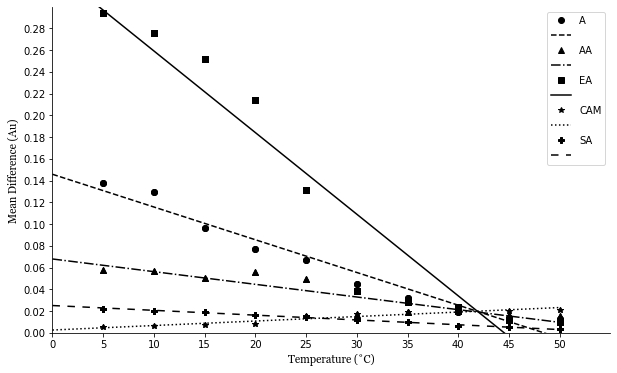

,Sample,Linear Regression Equation,R-squared Value
0,E1-SA,0.02504x + 0.0246,0.98949
1,E1-EA,-0.00751x + 0.33428,0.90601
2,E1-CAM,0.00041x + 0.00251,0.92071
3,E1-AA,-0.00117x + 0.06786,0.81612
4,E1-A,-0.00301x + 0.14577,0.95623


In [3131]:
#Plot all the save_dfs data on the same plot with different color
pyplot.figure(figsize=(10, 6))

#Make mean difference positive
save_dfA['Mean Difference'] = abs(save_dfA['Mean Difference'])
save_dfAA['Mean Difference'] = abs(save_dfAA['Mean Difference'])
save_dfSA['Mean Difference'] = abs(save_dfSA['Mean Difference'])
save_dfCAM['Mean Difference'] = abs(save_dfCAM['Mean Difference'])
save_dfEA['Mean Difference'] = abs(save_dfEA['Mean Difference'])

#Plot save_dfA with blue circle markers 
pyplot.plot(save_dfA['Temperature (˚C)'], save_dfA['Mean Difference'], 'ko')

#save_dfA error bar line
pyplot.errorbar(save_dfA['Temperature (˚C)'], save_dfA['Mean Difference'], yerr=save_dfA['Interval'], fmt='ko')

#Linear regression line in blue
pyplot.plot(np.arange(0, 53, 5), np.poly1d(np.polyfit(save_dfA['Temperature (˚C)'], save_dfA['Mean Difference'], 1))(np.arange(0, 53, 5)), 'k--')

#Plot save_dfAA with red triangle markers
pyplot.plot(save_dfAA['Temperature (˚C)'], save_dfAA['Mean Difference'], 'k^')

#save_dfAA error bar
pyplot.errorbar(save_dfAA['Temperature (˚C)'], save_dfAA['Mean Difference'], yerr=save_dfAA['Interval'], fmt='k^')

#Linear regression line in red
pyplot.plot(np.arange(0, 53, 5), np.poly1d(np.polyfit(save_dfAA['Temperature (˚C)'], save_dfAA['Mean Difference'], 1))(np.arange(0, 53, 5)), 'k-.')

#Plot save_dfEA with green square markers
pyplot.plot(save_dfEA['Temperature (˚C)'], save_dfEA['Mean Difference'], 'ks')

#save_dfEA error bar
pyplot.errorbar(save_dfEA['Temperature (˚C)'], save_dfEA['Mean Difference'], yerr=save_dfEA['Interval'], fmt='ks')

#Linear regression line in green
pyplot.plot(np.arange(0, 53, 5), np.poly1d(np.polyfit(save_dfEA['Temperature (˚C)'], save_dfEA['Mean Difference'], 1))(np.arange(0, 53, 5)), 'k-')

#Plot save_dfCAM with black star markers
pyplot.plot(save_dfCAM['Temperature (˚C)'], save_dfCAM['Mean Difference'], 'k*')

#save_dfCAM error bar
pyplot.errorbar(save_dfCAM['Temperature (˚C)'], save_dfCAM['Mean Difference'], yerr=save_dfCAM['Interval'], fmt='k*')

#Linear regression line in black
pyplot.plot(np.arange(0, 53, 5), np.poly1d(np.polyfit(save_dfCAM['Temperature (˚C)'], save_dfCAM['Mean Difference'], 1))(np.arange(0, 53, 5)), 'k:')

#Plot save_dfSA with yellow plus markers
pyplot.plot(save_dfSA['Temperature (˚C)'], save_dfSA['Mean Difference'], 'kP')

#save_dfSA error bar
pyplot.errorbar(save_dfSA['Temperature (˚C)'], save_dfSA['Mean Difference'], yerr=save_dfSA['Interval'], fmt='kP')

#Linear regression line in yellow
pyplot.plot(np.arange(0, 53, 5), np.poly1d(np.polyfit(save_dfSA['Temperature (˚C)'], save_dfSA['Mean Difference'], 1))(np.arange(0, 53, 5)), 'k-', dashes = (5, 5))

#Label the plot
pyplot.xlabel('Temperature (˚C)', fontdict = font)
pyplot.ylabel('Mean Difference (Au)', fontdict = font)

#Fix x-axis and y-axis limits
pyplot.xlim(0, 55)
pyplot.ylim(0, 0.3)

#Fix x-axis and y-axis ticks
pyplot.xticks(np.arange(0, 55, 5))
pyplot.yticks(np.arange(0, 0.3, 0.02))

#Remove right and top border
pyplot.gca().spines['right'].set_visible(False)
pyplot.gca().spines['top'].set_visible(False)

#Print legend of the plot where A = blue line, AA = red line, SA = green line, CAM = black line, EA = yellow line and show the line and color next to each other on top right 
pyplot.legend(['A', '', 'AA', '', 'EA', '', 'CAM', '', 'SA', ''], loc = 'upper right')

#Save data
dfr.to_csv('Processed Data/E1-Plot-Data.csv')

#Save graph
pyplot.savefig('Graphs/E1-Plot-Graph.jpg', dpi=500)

#Display the plot
pyplot.show()
dfr

In [ ]:
#Plot all the save_dfs data on the same plot with different color
pyplot.figure(figsize=(10, 6))

#Make mean difference positive
save_dfA['Mean Difference'] = abs(save_dfA['Mean Difference'])
save_dfAA['Mean Difference'] = abs(save_dfAA['Mean Difference'])
save_dfSA['Mean Difference'] = abs(save_dfSA['Mean Difference'])
save_dfCAM['Mean Difference'] = abs(save_dfCAM['Mean Difference'])
save_dfEA['Mean Difference'] = abs(save_dfEA['Mean Difference'])

#Plot save_dfA with blue circle markers 
pyplot.plot(save_dfA['Temperature (˚C)'], save_dfA['Mean Difference'], 'ko')

#save_dfA error bar line
pyplot.errorbar(save_dfA['Temperature (˚C)'], save_dfA['Mean Difference'], yerr=save_dfA['Interval'], fmt='ko')

#Linear regression line in blue
pyplot.plot(np.arange(0, 53, 5), np.poly1d(np.polyfit(save_dfA['Temperature (˚C)'], save_dfA['Mean Difference'], 1))(np.arange(0, 53, 5)), 'k--')

#Plot save_dfAA with red triangle markers
pyplot.plot(save_dfAA['Temperature (˚C)'], save_dfAA['Mean Difference'], 'k^')

#save_dfAA error bar
pyplot.errorbar(save_dfAA['Temperature (˚C)'], save_dfAA['Mean Difference'], yerr=save_dfAA['Interval'], fmt='k^')

#Linear regression line in red
pyplot.plot(np.arange(0, 53, 5), np.poly1d(np.polyfit(save_dfAA['Temperature (˚C)'], save_dfAA['Mean Difference'], 1))(np.arange(0, 53, 5)), 'k-.')

#Plot save_dfEA with green square markers
pyplot.plot(save_dfEA['Temperature (˚C)'], save_dfEA['Mean Difference'], 'ks')

#save_dfEA error bar
pyplot.errorbar(save_dfEA['Temperature (˚C)'], save_dfEA['Mean Difference'], yerr=save_dfEA['Interval'], fmt='ks')

#Linear regression line in green
pyplot.plot(np.arange(0, 53, 5), np.poly1d(np.polyfit(save_dfEA['Temperature (˚C)'], save_dfEA['Mean Difference'], 1))(np.arange(0, 53, 5)), 'k-')

#Plot save_dfCAM with black star markers
pyplot.plot(save_dfCAM['Temperature (˚C)'], save_dfCAM['Mean Difference'], 'k*')

#save_dfCAM error bar
pyplot.errorbar(save_dfCAM['Temperature (˚C)'], save_dfCAM['Mean Difference'], yerr=save_dfCAM['Interval'], fmt='k*')

#Linear regression line in black
pyplot.plot(np.arange(0, 53, 5), np.poly1d(np.polyfit(save_dfCAM['Temperature (˚C)'], save_dfCAM['Mean Difference'], 1))(np.arange(0, 53, 5)), 'k:')

#Plot save_dfSA with yellow plus markers
pyplot.plot(save_dfSA['Temperature (˚C)'], save_dfSA['Mean Difference'], 'kP')

#save_dfSA error bar
pyplot.errorbar(save_dfSA['Temperature (˚C)'], save_dfSA['Mean Difference'], yerr=save_dfSA['Interval'], fmt='kP')

#Linear regression line in yellow
pyplot.plot(np.arange(0, 53, 5), np.poly1d(np.polyfit(save_dfSA['Temperature (˚C)'], save_dfSA['Mean Difference'], 1))(np.arange(0, 53, 5)), 'k-', dashes = (5, 5))

#Label the plot
pyplot.xlabel('Temperature (˚C)', fontdict = font)
pyplot.ylabel('Mean Difference (Au)', fontdict = font)

#Fix x-axis and y-axis limits
pyplot.xlim(0, 55)
pyplot.ylim(0, 0.3)

#Fix x-axis and y-axis ticks
pyplot.xticks(np.arange(0, 55, 5))
pyplot.yticks(np.arange(0, 0.3, 0.02))

#Remove right and top border
pyplot.gca().spines['right'].set_visible(False)
pyplot.gca().spines['top'].set_visible(False)

#Print legend of the plot where A = blue line, AA = red line, SA = green line, CAM = black line, EA = yellow line and show the line and color next to each other on top right 
pyplot.legend(['A', '', 'AA', '', 'EA', '', 'CAM', '', 'SA', ''], loc = 'upper right')

#Save data
dfr.to_csv('Processed Data/E1-Plot-Data.csv')

#Save graph
pyplot.savefig('Graphs/E1-Plot-Graph.jpg', dpi=500)

#Display the plot
pyplot.show()
dfr